<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/master/predict_aquatic_toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QSAR Aquatic Toxicity Prediction with Simple Neural Networks Using TensorFlow

Mount drive

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**

Import libraries

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

In [69]:
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";")
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


**Data information and characteristics**

In [70]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
TPSA                   546 non-null float64
SAacc                  546 non-null float64
H-050                  546 non-null int64
MLOGP                  546 non-null float64
RDCHI                  546 non-null float64
GATS1p                 546 non-null float64
nN                     546 non-null int64
C-040                  546 non-null int64
quantitive response    546 non-null float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


## Split data

70% of data for data training and 30% of data for data testing

In [71]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitive response'),
                                                   data['quantitive response'],
                                                   test_size=0.3)
print("Train: ", len(x_train))
print("Test: ", len(x_test))

Train:  382
Test:  164


## Train and test the models

In [72]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

Mead Squared Error Linear Regression :  1.4943257604046192
Mead Squared Error Multilayer Perceptron :  8.024795828825814


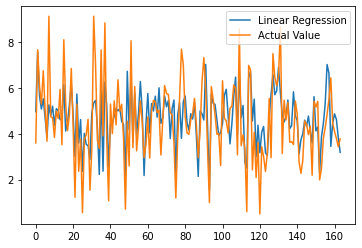

In [73]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

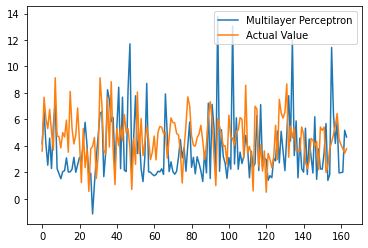

In [74]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

<h2>TENSORFLOW PART</h2>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

## Modeling

Consists of :
8 nodes in the input layer
8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [77]:
model = Simple_NN()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Training model

In [78]:
model.fit(x_train, y_train, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 182.2457 - mae: 11.1700 - mse: 184.0239 - val_loss: 79.6983 - val_mae: 7.3265 - val_mse: 73.6348
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 51.6194 - mae: 6.2460 - mse: 52.4295 - val_loss: 30.4468 - val_mae: 4.7924 - val_mse: 29.8676
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 18.2953 - mae: 3.7265 - mse: 18.6206 - val_loss: 12.9426 - val_mae: 3.1028 - val_mse: 13.5208
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 9.6288 - mae: 2.6377 - mse: 9.7571 - val_loss: 8.4054 - val_mae: 2.3961 - val_mse: 8.7628
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 7.6724 - mae: 2.2616 - mse: 7.6156 - val_loss: 7.9663 - val_mae: 2.3674 - val_mse: 8.0725
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 6.3040 - mae: 2.0674 - mse: 6.3917 - val_loss: 6.5865 - val_mae: 2.0220 - val_mse: 6.5282
Epoch 

## Testing model to predict the <b>x_test</b>

In [79]:
hasil_tf = model.predict(x_test)

# HASIL PREDIKSI
hasil_tf.ravel()

array([5.071251 , 6.746087 , 6.0627527, 6.030834 , 5.7090893, 4.768486 ,
       3.4188564, 6.255804 , 4.372282 , 5.0475683, 3.8321846, 5.201397 ,
       4.5856457, 4.382347 , 4.923217 , 6.522684 , 3.9324365, 4.2660036,
       5.1339417, 6.6580276, 4.365841 , 3.649948 , 5.872571 , 3.2312934,
       4.599825 , 2.1970053, 3.551533 , 5.8288336, 2.6060965, 2.8422678,
       4.7532597, 6.2315416, 6.014638 , 3.8756378, 2.3075736, 6.7437115,
       2.007633 , 6.1740227, 5.662964 , 2.621452 , 4.325431 , 4.8134346,
       4.372282 , 5.0170584, 5.054738 , 5.2155285, 6.6095095, 4.2129335,
       2.4233873, 7.4014826, 4.6471977, 6.659133 , 3.408223 , 5.9273357,
       3.1917977, 4.6013336, 6.357423 , 4.2819624, 2.5525799, 4.4900913,
       5.4642696, 3.81516  , 5.3371925, 4.2819624, 5.8600874, 4.611224 ,
       5.7272434, 4.5179167, 4.1474686, 5.183057 , 4.467942 , 4.6644907,
       4.6062784, 5.040266 , 5.141556 , 1.8684657, 4.251095 , 4.6492033,
       3.7583106, 5.992447 , 5.1190643, 4.2761726, 

## Evaluate the model using <b>mean squared error</b>

Getting smaller the MSE of a model, getting better model in predicting

In [80]:
mean_squared_error(y_test, hasil_tf)

1.580812498236921

## Data result visualization with line chart

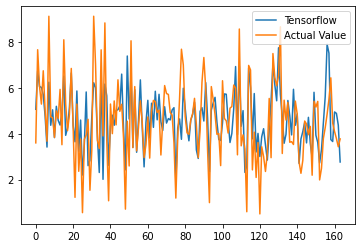

In [81]:
plt.plot(list(hasil_tf), label='Tensorflow')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")